## **AI Content Firewall for Kids - Kids.ai**

### `Business Understanding`

## **Business Goal**
### **Primary Goal**
Develop an **AI-powered Content Firewall for Kids** that dynamically analyzes scraps a website and filters inappropriate online content using **Natural Language Processing (NLP) and Image Classification (CNNs)**. The system ensures a **safe browsing experience** for children aged **6–12 years** by blocking harmful content in real time.

### **Key Business Objectives**
1. **Automate Content Moderation**
   - Classify websites, images, and videos as **Safe, Adult, Harmful, or Suicide Content**.
   - Use **machine learning models** for real-time classification.

2. **Ensure Age-Appropriate Web Access**
   - Prevent exposure to violent, sexual, or psychologically harmful material.
   - Support children’s educational and entertainment needs.

3. **Implement Platform-Agnostic Filtering**
   - Deploy as **a browser extension, firewall, or parental control application**.
   - Work across different platforms and devices.


## **Business Constraints**
### **Resource & Time Constraints**
- The project is **part of a school research project**.
- Limited **computational power** for training deep learning models.
- Need to use **publicly available datasets** and **web scraping** for data collection.

### **Ethical & Privacy Constraints**
- No **collection of personally identifiable information (PII)** from users.
- Must comply with **COPPA (Children’s Online Privacy Protection Act)** and **GDPR**.
- **Avoid biases** in classification (e.g., racial, cultural, or religious biases in model predictions).

---

## **Stakeholders**
| **Stakeholder** | **Role & Interest** |
|-------------|----------------|
| **Parents & Guardians** | Want a **safe** internet experience for their children. |
| **Children (6–12 years old)** | Primary users of the internet who need protection from harmful content. |
| **Schools & Educational Institutions** | May use the system for **school-controlled internet access**. |
| **Developers & AI Researchers** | Build and improve AI-powered filtering systems. |
| **Policy Makers & Child Safety Organizations** | Interested in **compliance** with child protection laws. |

---

## **Success Criteria (KPIs)**
### 🔹 **Model Accuracy & Performance**
✅ **Classification Accuracy ≥ 85%** for Safe vs. Harmful content.  
✅ **False Negative Rate ≤ 5%** (minimizing inappropriate content slipping through).  
✅ **Precision Rate >= 85%** per website/video frame for real-time filtering.  

### 🔹 **User Experience Metrics**
✅ **Parental Acceptance Rate**: % of parents who find the firewall **useful**.  
✅ **Content Moderation Override Rate**: % of wrongly blocked pages that require manual override.  

### 🔹 **System Deployment Feasibility**
✅ **Ease of Integration** with **browsers & parental control tools**.  
✅ **Cross-Platform Compatibility** (Windows, macOS, Android, iOS).  

---

## **Key Business Questions**
1. **What defines "kid-friendly" vs. "not kid-friendly" content?**  
   - Using established guidelines from **COPPA**, **Google SafeSearch**, and **child safety organizations**.
   
2. **How accurate must the system be to gain user trust?**  
   - Balance between **precision and recall** (too strict vs. too lenient).
   
3. **What types of content need filtering?**  
   - Text (web pages, captions), Images (memes, banners), Videos (frames, subtitles).

4. **How should the system handle borderline content?**  
   - Use **Parental Override & Review Systems**.

---

## **Assumptions & Risks**
### ✅ **Assumptions**
- AI **can reliably classify** web content as safe or harmful.
- Parents will **trust** AI-powered filtering over manual methods.
- Web content changes over time, requiring **continuous model retraining**.

### ⚠️ **Risks & Mitigation**
| **Risk** | **Mitigation Strategy** |
|------|---------------------|
| **High false positives (safe content getting blocked)** | Allow parental override & feedback loop. |
| **AI bias in classification** | Train on a **diverse dataset** from different regions/cultures. |
| **Computational cost for real-time filtering** | Optimize models using **lightweight architectures (MobileNet, DistilBERT)**. |
| **Evasion by malicious content creators** | Continuously update detection techniques. |

---

## **Project Scope**
| **Feature** | **Included (✅) or Future Work (⏳)** |
|---------|--------------------------------|
| **Website text filtering (NLP)** | ✅ |
| **Image classification (CNNs)** | ✅ |
| **Video frame analysis** | ✅ |
| **Parental controls (whitelist/blacklist, browsing reports)** | ⏳ |
| **Speech-to-text analysis (for spoken content in videos)** | ⏳ |
| **AI-powered chatbot to guide kids online** | ⏳ |

---

## **Deployment Considerations**
### 🔹 **Where Will This Be Used?**
- **Browser Extension** *(Real-time filtering while browsing)*
- **Standalone Parental Control App**
- **Network-Level Filtering (ISP-based)**
- **Classroom Filtering System**

### 🔹 **Deployment Stack**
| **Component** | **Technology** |
|-----------|-----------|
| **Text Analysis** | BERT, RoBERTa, Scikit-learn |
| **Image Classification** | CNNs (ResNet, EfficientNet) |
| **OCR for Images & Videos** | EasyOCR, Tesseract |
| **Backend API** | FastAPI, Flask |
| **Database (logs, parental controls)** | PostgreSQL, Firebase |
| **Frontend (for parental settings)** | React, Vue.js |
| **Deployment** | Docker, AWS/GCP |

---

## **Final Summary of Business Understanding**
1. **Business Goal**: Ensure a **safe digital experience for children** using **AI-driven filtering**.
2. **Key Stakeholders**: Parents, children, educators, policymakers.
3. **Key Business Questions**: Define "kid-safe" content, optimize AI filtering, improve parental control.
4. **Success Metrics**: **≥ 85% accuracy**, **fast filtering**, **low false negatives**.
5. **Potential Risks**: False positives, AI bias, computational cost.
6. **Deployment Plan**: Start with **browser extension**, expand to **network-level filtering**.


### `Data Understanding`

In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import plotly.express as px
import imghdr
from matplotlib import pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import hashlib


print(tf.__version__)

2.18.0


#### **Load data set**

In [58]:
csv_file = "../Dataset/path_dataset.csv"  
df = pd.read_csv(csv_file)
df

,Label,Image_path
0,Adult,ml\Dataset\extracted_frames\train\Adult Conten...
1,Adult,ml\Dataset\extracted_frames\train\Adult Conten...
2,Adult,ml\Dataset\extracted_frames\train\Adult Conten...
3,Adult,ml\Dataset\extracted_frames\train\Adult Conten...
4,Adult,ml\Dataset\extracted_frames\train\Adult Conten...
...,...,...
30704,Suicide,ml\Dataset\extracted_frames\test\Suicide\_im.a...
30705,Suicide,ml\Dataset\extracted_frames\test\Suicide\_im.a...
30706,Suicide,ml\Dataset\extracted_frames\test\Suicide\_im.a...
30707,Suicide,ml\Dataset\extracted_frames\test\Suicide\_nctr...


#### **Exploratory Analysis**

In [59]:
df["Image_path"] = df["Image_path"].apply(
    lambda path: path.replace("ml\\Dataset\\extracted_frames", "..\\Dataset\\extracted_frames", 1)
    if path.startswith("ml")
    else path
)

In [34]:
df

,Label,Image_path
0,Adult,..\Dataset\extracted_frames\train\Adult Conten...
1,Adult,..\Dataset\extracted_frames\train\Adult Conten...
2,Adult,..\Dataset\extracted_frames\train\Adult Conten...
3,Adult,..\Dataset\extracted_frames\train\Adult Conten...
4,Adult,..\Dataset\extracted_frames\train\Adult Conten...
...,...,...
30704,Suicide,..\Dataset\extracted_frames\test\Suicide\_im.a...
30705,Suicide,..\Dataset\extracted_frames\test\Suicide\_im.a...
30706,Suicide,..\Dataset\extracted_frames\test\Suicide\_im.a...
30707,Suicide,..\Dataset\extracted_frames\test\Suicide\_nctr...


In [60]:
df.shape

(30709, 2)

In [61]:
df['Label'].unique()

array(['Adult', 'Harmful', 'Safe', 'Suicide'], dtype=object)

##### **Verify 1 image**

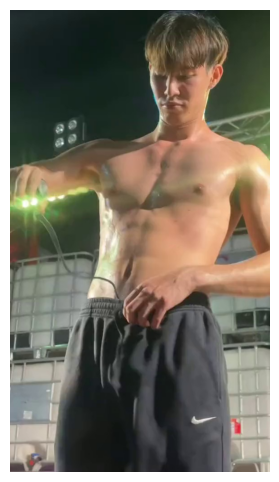

In [62]:
image_path = df["Image_path"].iloc[15]

# Load the image using OpenCV
img = cv2.imread(image_path)

# Check if the image loaded successfully
if img is None:
    print(f"Error: Unable to load image from {image_path}")
else:
    # Convert the image from BGR (default in OpenCV) to RGB (used by matplotlib)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")  
    plt.show()


##### **Check data & class distribution**

In [63]:
# Count labels from your existing DataFrame
label_counts = df["Label"].value_counts().reset_index()
label_counts.columns = ["Label", "Count"]

# Calculate percentages
total_count = label_counts["Count"].sum()
label_counts["Percentage"] = (label_counts["Count"] / total_count) * 100

# Create a text column that shows both count and percentage
label_counts["Text"] = label_counts.apply(lambda row: f"{row['Count']} ({row['Percentage']:.2f}%)", axis=1)

# Define a custom color map: 'Safe' will be green, all others will be orange.
color_map = {
    "Safe": "green",
    "Adult": "orange",
    "Harmful": "orange",
    "Suicide": "orange"
}

# Create the bar chart
fig = px.bar(
    label_counts,
    x="Label",
    y="Count",
    text="Text",
    title="Class Distribution Across Train, Val, and Test",
    color="Label",
    color_discrete_map=color_map  # Custom colors for each label
)

# Place the text labels outside the bars
fig.update_traces(textposition="outside")

# Optionally, update axis labels
fig.update_layout(xaxis_title="Label", yaxis_title="Count", height=600)

fig.show()


### `Data Preparation`

In [64]:
df.head()

,Label,Image_path
0,Adult,..\Dataset\extracted_frames\train\Adult Conten...
1,Adult,..\Dataset\extracted_frames\train\Adult Conten...
2,Adult,..\Dataset\extracted_frames\train\Adult Conten...
3,Adult,..\Dataset\extracted_frames\train\Adult Conten...
4,Adult,..\Dataset\extracted_frames\train\Adult Conten...


#### **Preprocess the images into *.npy* Array for Neural Network**

In [68]:
# Function to Preprocess images
def preprocess_image(image_path, save_path):
    if not os.path.exists(image_path):
        print(f"Warning: File {image_path} not found.")
        return None
    
    # Read the image in BGR
    img = cv2.imread(image_path)
    if img is None:
        print(f"Warning: Could not read image {image_path}")
        return None

    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Resize for CNN input
    img = cv2.resize(img, (224, 224))
    
    # Normalize pixel values
    img = img / 255.0
    
    # Create a unique filename by hashing the full image path
    unique_hash = hashlib.md5(image_path.encode("utf-8")).hexdigest()
    npy_filename = f"{unique_hash}.npy"
    
    # Construct the final .npy path
    npy_path = os.path.join(save_path, npy_filename)
    
    # Save the image array
    np.save(npy_path, img)
    return npy_path

# Load your DataFrame (adjust CSV path as needed)
#df = pd.read_csv("../Dataset/final_preprocessed_dataset.csv")

# Create the output directory if it doesn't exist
output_dir = "../Dataset/final_preprocessed_images"
os.makedirs(output_dir, exist_ok=True)

# Apply preprocessing with a progress bar using tqdm
df["Processed Image Path"] = [
    preprocess_image(img, output_dir) 
    for img in tqdm(df["Image_path"], desc="Processing Images")
]

# Save updated CSV
df.to_csv("../Dataset/final_preprocessed_dataset.csv", index=False)
print(f"Processed {df['Processed Image Path'].notna().sum()} images and saved paths to DataFrame.")


Processing Images: 100%|██████████| 30709/30709 [09:27<00:00, 54.12it/s]


Processed 30709 images and saved paths to DataFrame.


In [41]:
# Function to Preprocess images
def preprocess_image(image_path, save_path):
    if os.path.exists(image_path):
        # Read the image in BGR
        img = cv2.imread(image_path)
        # Convert BGR to RGB immediately
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Resize for CNN input
        img = cv2.resize(img, (224, 224))
        # Normalize pixel values
        img = img / 255.0
        
        # Save as .npy file (now in RGB)
        npy_path = os.path.join(save_path, os.path.basename(image_path).replace(".jpg", ".npy"))
        np.save(npy_path, img)
        return npy_path
    else:
        print(f"Warning: File {image_path} not found.")
        return None


# Create the output directory if it doesn't exist
output_dir = "final_preprocessed_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Apply preprocessing with a progress bar using tqdm
df["Processed Image Path"] = [preprocess_image(img, output_dir) for img in tqdm(df["Image_path"], desc="Processing Images")]

# Save updated CSV
df.to_csv("../Dataset/final_preprocessed_dataset.csv", index=False)
print(f"Processed {df['Processed Image Path'].notna().sum()} images and saved paths to DataFrame.")


Processing Images: 100%|██████████| 30709/30709 [09:08<00:00, 56.00it/s]

Processed 30709 images and saved paths to DataFrame.


In [69]:
# Load the CSV
df = pd.read_csv("../Dataset/final_preprocessed_dataset.csv")
df

,Label,Image_path,Processed Image Path
0,Adult,..\Dataset\extracted_frames\train\Adult Conten...,../Dataset/final_preprocessed_images\8d72acee0...
1,Adult,..\Dataset\extracted_frames\train\Adult Conten...,../Dataset/final_preprocessed_images\6dc676cc5...
2,Adult,..\Dataset\extracted_frames\train\Adult Conten...,../Dataset/final_preprocessed_images\bb4b8c84e...
3,Adult,..\Dataset\extracted_frames\train\Adult Conten...,../Dataset/final_preprocessed_images\e9ad9697f...
4,Adult,..\Dataset\extracted_frames\train\Adult Conten...,../Dataset/final_preprocessed_images\5b6540be5...
...,...,...,...
30704,Suicide,..\Dataset\extracted_frames\test\Suicide\_im.a...,../Dataset/final_preprocessed_images\2177f23e7...
30705,Suicide,..\Dataset\extracted_frames\test\Suicide\_im.a...,../Dataset/final_preprocessed_images\2dfe2fb1d...
30706,Suicide,..\Dataset\extracted_frames\test\Suicide\_im.a...,../Dataset/final_preprocessed_images\7c0fcaf64...
30707,Suicide,..\Dataset\extracted_frames\test\Suicide\_nctr...,../Dataset/final_preprocessed_images\83888bd5c...


In [70]:
df['Processed Image Path'].isna().sum()

np.int64(0)

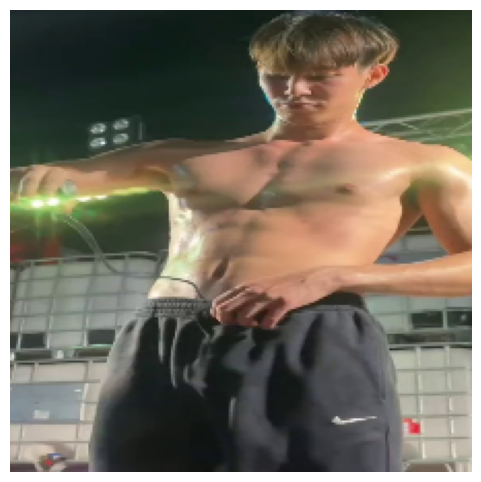

: 

In [ ]:
# Set the path to your .npy image file (update this path as needed)
npy_path = df['Processed Image Path'].iloc[15]

# Load the image from the .npy file
img = np.load(npy_path)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis("off")  # Hide the axis
plt.show()

#### **`Modelling Done in Google Collab With GPUs`**